# Tabular Data EDA: Imputation
Erica Landreth

20241111

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data_dir = os.path.abspath(os.path.join('..', 'data'))
data = pd.read_csv(os.path.join(data_dir,'train.csv'))
data_dict = pd.read_csv(os.path.join(data_dir,'data_dictionary.csv'))


In [3]:
data_dict

,Instrument,Field,Description,Type,Values,Value Labels
0,Identifier,id,Participant's ID,str,NaN,NaN
1,Demographics,Basic_Demos-Enroll_Season,Season of enrollment,str,"Spring, Summer, Fall, Winter",NaN
2,Demographics,Basic_Demos-Age,Age of participant,float,NaN,NaN
3,Demographics,Basic_Demos-Sex,Sex of participant,categorical int,"0,1","0=Male, 1=Female"
4,Children's Global Assessment Scale,CGAS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
...,...,...,...,...,...,...
76,Sleep Disturbance Scale,SDS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
77,Sleep Disturbance Scale,SDS-SDS_Total_Raw,Total Raw Score,int,NaN,NaN
78,Sleep Disturbance Scale,SDS-SDS_Total_T,Total T-Score,int,NaN,NaN
79,Internet Use,PreInt_EduHx-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN


In [4]:
data

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0


### Data Imputation

Start with rows that are not missing PCIAT/SII info, and filter out those columns.

Also not super interested in imputing seasons.

In [5]:
data.dropna(subset='sii',inplace=True)
for col in data.columns:
    if 'PCIAT' in col or 'sii' in col or 'Season' in col:
        data.drop(col,axis=1,inplace=True)

In [6]:
data.head()

,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,...,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-PAQ_A_Total,PAQ_C-PAQ_C_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,5,0,51.0,16.877316,46.0,50.8,NaN,NaN,NaN,...,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,3.0
1,000fd460,9,0,NaN,14.035590,48.0,46.0,22.0,75.0,70.0,...,21.0352,14.97400,39.4497,15.4107,27.0552,NaN,2.340,46.0,64.0,0.0
2,00105258,10,1,71.0,16.648696,56.5,75.6,NaN,65.0,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.170,38.0,54.0,2.0
3,00115b9f,9,0,71.0,18.292347,56.0,81.6,NaN,60.0,97.0,...,30.4041,16.77900,58.9338,26.4798,45.9966,NaN,2.451,31.0,45.0,0.0
5,001f3379,13,1,50.0,22.279952,59.5,112.2,NaN,60.0,73.0,...,32.9141,20.90200,79.6982,35.3804,63.1265,NaN,4.110,40.0,56.0,0.0


In [7]:
is_missing = data.isna().sum(axis=0).to_frame()
is_missing
# is_missing.to_csv('is_missing.csv')

,0
id,0
Basic_Demos-Age,0
Basic_Demos-Sex,0
CGAS-CGAS_Score,394
Physical-BMI,209
Physical-Height,206
Physical-Weight,164
Physical-Waist_Circumference,2253
Physical-Diastolic_BP,258
Physical-HeartRate,250


**PAQ: Seems like only adult or child field will be filled in. So combine them.**

In [8]:
data['PAQ'] = data['PAQ_A-PAQ_A_Total'].fillna(data['PAQ_C-PAQ_C_Total'])
data.drop('PAQ_A-PAQ_A_Total',axis=1,inplace=True)
data.drop('PAQ_C-PAQ_C_Total',axis=1,inplace=True)

**Physical: height/weight info probably not as informative as BMI, so use that instead. Also, can fill from BIA BMI if stil missing.**

In [9]:
data.head()

,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,...,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,PAQ
0,00008ff9,5,0,51.0,16.877316,46.0,50.8,NaN,NaN,NaN,...,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,3.0,NaN
1,000fd460,9,0,NaN,14.035590,48.0,46.0,22.0,75.0,70.0,...,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,46.0,64.0,0.0,2.340
2,00105258,10,1,71.0,16.648696,56.5,75.6,NaN,65.0,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,38.0,54.0,2.0,2.170
3,00115b9f,9,0,71.0,18.292347,56.0,81.6,NaN,60.0,97.0,...,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,31.0,45.0,0.0,2.451
5,001f3379,13,1,50.0,22.279952,59.5,112.2,NaN,60.0,73.0,...,2.0,32.9141,20.90200,79.6982,35.3804,63.1265,40.0,56.0,0.0,4.110


In [10]:
data['calc-BMI'] = data['Physical-Weight']*0.453592 / (data['Physical-Height']*0.0254)**2
                        #weight kg/height m squared
data['Physical-BMI'] = data['Physical-BMI'].fillna(data['calc-BMI'])
data['Physical-BMI'] = data['Physical-BMI'].fillna(data['BIA-BIA_BMI'])

# and fill the other way around too
data['BIA-BIA_BMI'] = data['BIA-BIA_BMI'].fillna(data['Physical-BMI'])

data.drop('Physical-Height',axis=1,inplace=True)
data.drop('Physical-Weight',axis=1,inplace=True)
data.drop('calc-BMI',axis=1,inplace=True)


**FitnessGram: Zones are derived from values and age. Can either fill in zones from these other fields, or drop entirely, since this is somewhat redundant info, and tends to be missing more often than the value itself.**

**Or maybe, instead of zones (which tend to take only 2-3 values), create some sort of "age-adjusted" value column, which takes into account age, but is more descriptive than zone**

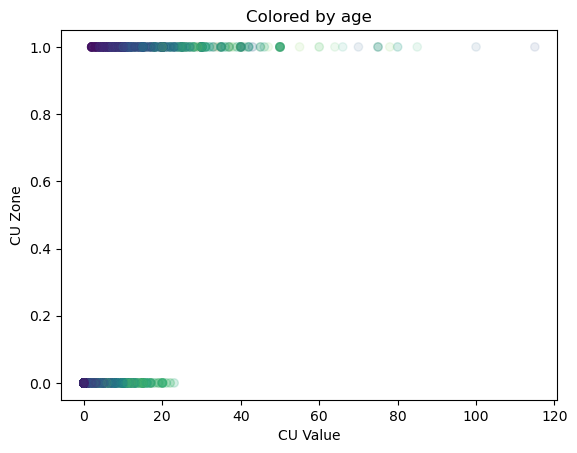

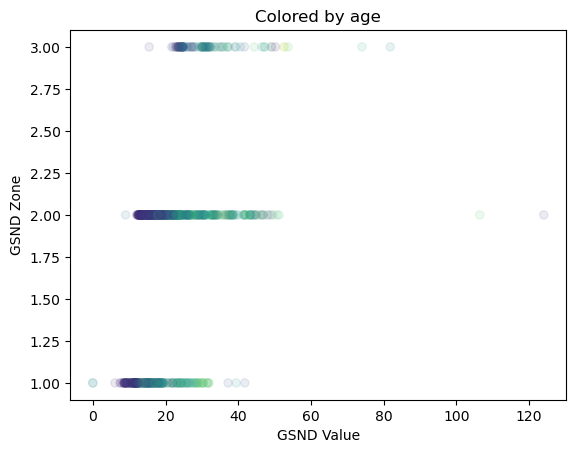

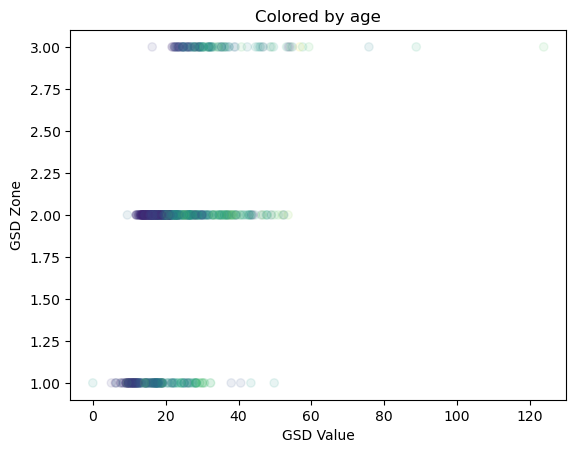

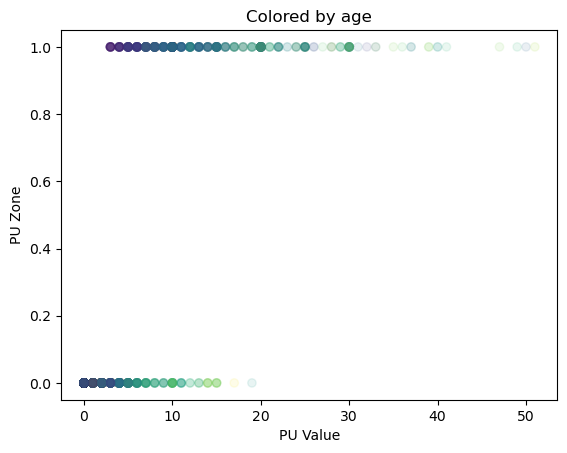

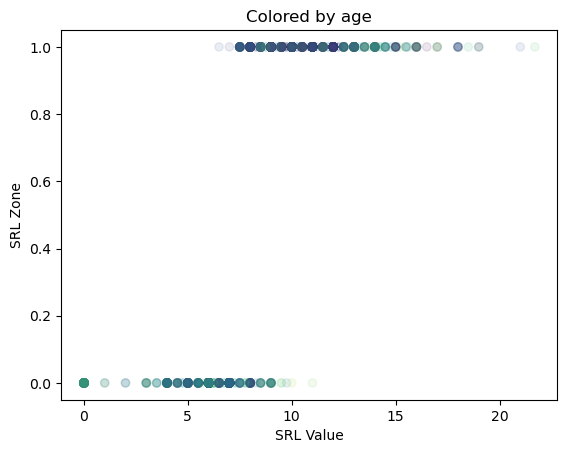

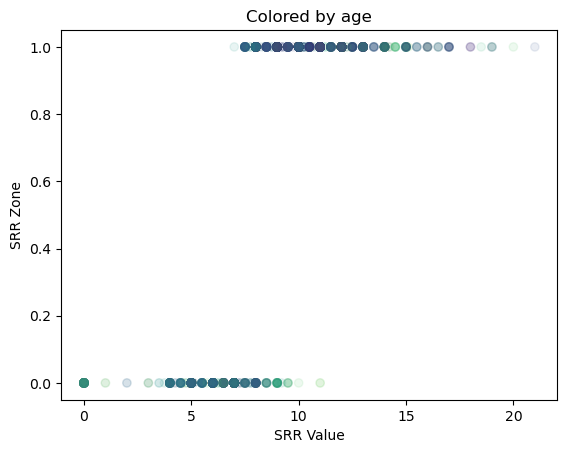

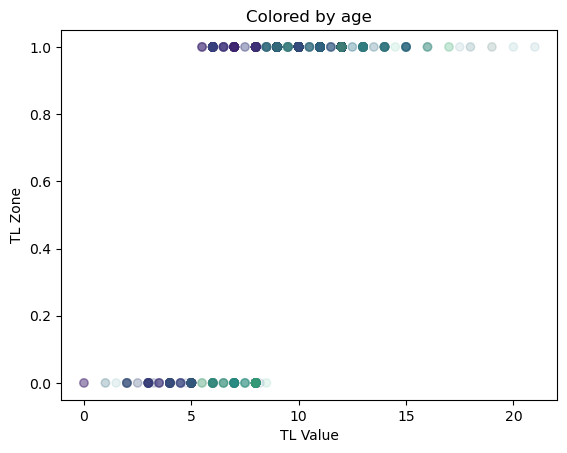

In [11]:
base = ['CU','GSND','GSD','PU','SRL','SRR','TL']
for b in base:
    f1 = f'FGC-FGC_{b}'
    f2 = f1+'_Zone'
    fig,ax = plt.subplots(1,1)
    ax.scatter(f1,f2,c='Basic_Demos-Age',data=data,alpha=0.1)
    ax.set_xlabel(f'{b} Value')
    ax.set_ylabel(f'{b} Zone')
    ax.set_title('Colored by age')
    plt.show()

For now, for the sake of simplicity, assume it's ok to remove the zone fields.

In [12]:
base = ['CU','GSND','GSD','PU','SRL','SRR','TL']
for b in base:
    data.drop(f'FGC-FGC_{b}_Zone',axis=1,inplace=True)

In [13]:
data

,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Max_Stage,...,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,PAQ
0,00008ff9,5,0,51.0,16.877316,NaN,NaN,NaN,NaN,NaN,...,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,3.0,NaN
1,000fd460,9,0,NaN,14.035590,22.0,75.0,70.0,122.0,NaN,...,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,46.0,64.0,0.0,2.340
2,00105258,10,1,71.0,16.648696,NaN,65.0,94.0,117.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,38.0,54.0,2.0,2.170
3,00115b9f,9,0,71.0,18.292347,NaN,60.0,97.0,117.0,6.0,...,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,31.0,45.0,0.0,2.451
5,001f3379,13,1,50.0,22.279952,NaN,60.0,73.0,102.0,NaN,...,2.0,32.9141,20.90200,79.6982,35.3804,63.1265,40.0,56.0,0.0,4.110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,ff6c2bb8,8,0,NaN,17.139810,25.0,60.0,65.0,112.0,NaN,...,1.0,25.7118,15.81500,49.3301,20.2645,36.7181,41.0,58.0,2.0,3.440
3954,ff759544,7,1,NaN,13.927006,23.0,65.0,75.0,105.0,NaN,...,1.0,20.0572,15.14000,42.8185,18.0937,30.0453,48.0,67.0,0.0,NaN
3955,ff8a2de4,13,0,60.0,16.362460,NaN,71.0,70.0,104.0,NaN,...,1.0,33.3709,17.97970,66.2889,29.7790,52.8320,35.0,50.0,1.0,3.260
3957,ffcd4dbd,11,0,68.0,21.441500,NaN,79.0,99.0,116.0,NaN,...,2.0,33.9805,21.34030,71.3903,28.7792,54.4630,56.0,77.0,0.0,2.729


In [14]:
is_missing = data.isna().sum(axis=0).to_frame().sort_values(by=0,ascending=False)
is_missing
# is_missing.to_csv('is_missing.csv')

,0
Physical-Waist_Circumference,2253
Fitness_Endurance-Time_Mins,2008
Fitness_Endurance-Time_Sec,2008
Fitness_Endurance-Max_Stage,2005
FGC-FGC_GSD,1865
FGC-FGC_GSND,1864
PAQ,934
BIA-BIA_ICW,923
BIA-BIA_Frame_num,923
BIA-BIA_LDM,923


**Drop columns that are almost always (1800+) missing**

In [15]:
drop_me = ['Physical-Waist_Circumference','Fitness_Endurance-Time_Mins','Fitness_Endurance-Time_Sec', \
           'Fitness_Endurance-Max_Stage','FGC-FGC_GSD','FGC-FGC_GSND']
data.drop(drop_me,axis=1,inplace=True)
data

,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,FGC-FGC_PU,...,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,PAQ
0,00008ff9,5,0,51.0,16.877316,NaN,NaN,NaN,0.0,0.0,...,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,3.0,NaN
1,000fd460,9,0,NaN,14.035590,75.0,70.0,122.0,3.0,5.0,...,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,46.0,64.0,0.0,2.340
2,00105258,10,1,71.0,16.648696,65.0,94.0,117.0,20.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,38.0,54.0,2.0,2.170
3,00115b9f,9,0,71.0,18.292347,60.0,97.0,117.0,18.0,5.0,...,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,31.0,45.0,0.0,2.451
5,001f3379,13,1,50.0,22.279952,60.0,73.0,102.0,12.0,6.0,...,2.0,32.9141,20.90200,79.6982,35.3804,63.1265,40.0,56.0,0.0,4.110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,ff6c2bb8,8,0,NaN,17.139810,60.0,65.0,112.0,0.0,0.0,...,1.0,25.7118,15.81500,49.3301,20.2645,36.7181,41.0,58.0,2.0,3.440
3954,ff759544,7,1,NaN,13.927006,65.0,75.0,105.0,0.0,0.0,...,1.0,20.0572,15.14000,42.8185,18.0937,30.0453,48.0,67.0,0.0,NaN
3955,ff8a2de4,13,0,60.0,16.362460,71.0,70.0,104.0,16.0,10.0,...,1.0,33.3709,17.97970,66.2889,29.7790,52.8320,35.0,50.0,1.0,3.260
3957,ffcd4dbd,11,0,68.0,21.441500,79.0,99.0,116.0,15.0,0.0,...,2.0,33.9805,21.34030,71.3903,28.7792,54.4630,56.0,77.0,0.0,2.729


**Now, if we were to drop na, how much data would we have left?**

In [16]:
data.dropna()

,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,FGC-FGC_PU,...,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,PAQ
3,00115b9f,9,0,71.0,18.292347,60.0,97.0,117.0,18.0,5.0,...,2.0,30.4041,16.7790,58.9338,26.4798,45.9966,31.0,45.0,0.0,2.451
5,001f3379,13,1,50.0,22.279952,60.0,73.0,102.0,12.0,6.0,...,2.0,32.9141,20.9020,79.6982,35.3804,63.1265,40.0,56.0,0.0,4.110
20,00f332d1,14,0,68.0,17.168636,60.0,71.0,129.0,16.0,22.0,...,2.0,41.4004,24.2158,86.9674,42.1074,68.6822,30.0,43.0,2.0,2.320
22,01085eb3,12,0,58.0,34.187282,67.0,81.0,119.0,8.0,0.0,...,3.0,47.2238,26.7834,102.3350,44.5863,80.7024,53.0,73.0,0.0,1.280
24,011e71c3,15,0,70.0,21.177784,61.0,58.0,144.0,0.0,5.0,...,2.0,35.9062,23.1596,70.9113,35.1487,56.4779,34.0,49.0,1.0,3.530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,fe9c71d8,9,0,80.0,15.891137,44.0,65.0,78.0,8.0,9.0,...,2.0,29.6535,16.5641,57.3004,25.8365,44.6590,33.0,47.0,0.0,2.910
3946,feb53635,14,0,70.0,19.036779,61.0,80.0,127.0,50.0,25.0,...,1.0,49.4503,27.9691,99.8566,67.3110,78.4590,51.0,71.0,3.0,2.850
3949,fefaffe0,12,1,80.0,22.348231,66.0,84.0,126.0,27.0,0.0,...,2.0,35.4840,21.2422,86.6468,40.4123,66.1928,30.0,43.0,0.0,2.490
3955,ff8a2de4,13,0,60.0,16.362460,71.0,70.0,104.0,16.0,10.0,...,1.0,33.3709,17.9797,66.2889,29.7790,52.8320,35.0,50.0,1.0,3.260


In [17]:
data.dropna().shape

(814, 33)

**Not horrible! But still might be worth seeing if we could either drop some of the "tests" or train models using different tests and combine the info down the line.**